# Refer [here](https://github.com/roTechnic/Cheats6DOFInverseKinematics/blob/main/Inverse%20kinematics.ipynb)

In [1]:
import ikpy.chain
import ikpy.utils.plot as plot_utils

import numpy as np
import time
import math

import ipywidgets as widgets

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("SO_5DOF_ARM100_05d.SLDASM/urdf/SO_5DOF_ARM100_05d.SLDASM.urdf",active_links_mask=[True, True, True, True, True, True, False], base_elements=["Base"])

/home/absin/Documents/robotics0/.venv/lib/python3.11/site-packages/ikpy/chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


In [3]:
target_position =[ 0.01823854, -0.18954605,  0.01      ]

target_orientation = [-1, 0, 0]


In [4]:
ik = my_chain.inverse_kinematics(target_position, target_orientation, orientation_mode="Y")
print("The angles of each joints are : ", list(map(lambda r:math.degrees(r),ik.tolist())))

The angles of each joints are :  [0.0, 89.86828374599467, 113.31958531864869, -132.82361492643847, -109.50653604701733, 720.0012749350269, 0.0]


In [5]:
computed_position = my_chain.forward_kinematics(ik)
print("Computed position: %s, original position : %s" % (computed_position[:3, 3], target_position))
print("Computed position (readable) : %s" % [ '%.2f' % elem for elem in computed_position[:3, 3] ])


Computed position: [ 0.0185238  -0.06544287  0.00999937], original position : [0.01823854, -0.18954605, 0.01]
Computed position (readable) : ['0.02', '-0.07', '0.01']


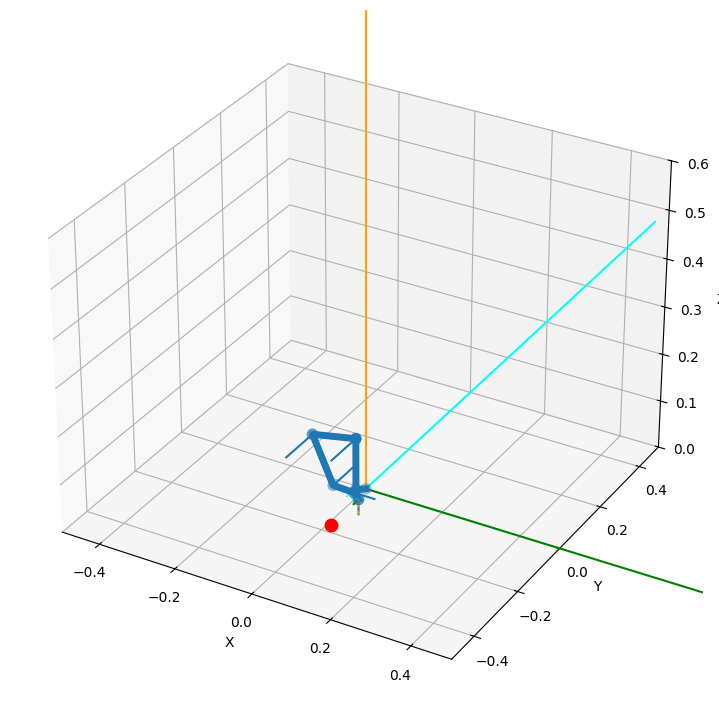

In [6]:
#%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
fig.set_figheight(9)  
fig.set_figwidth(13)  
my_chain.plot(ik, ax, target=target_position)
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
ax.set_zlim(0, 0.6)
plt.ion()

In [7]:
import imageio
import gymnasium as gym
import numpy as np
import gym_so100
import numpy
#import torch

ModuleNotFoundError: No module named 'gym_so100'

In [8]:
env = gym.make("gym_so100/PushCube-v0", render_mode="human")
observation, info = env.reset()

frames = []

/home/absin/Documents/gym-so100/venv/lib/python3.12/site-packages/glfw/__init__.py:917: GLFWError: (65548) b'Wayland: The platform does not provide the window position'
  warnings.warn(message, GLFWError)


In [41]:
i = 0
while i < 100:
    numpy_observation, reward, terminated, truncated, info = env.step([0.0, 89.86828374599467, 113.31958531864869, -132.82361492643847, -109.50653604701733, 720.0012749350269, 0.0])
    i = i + 1

ValueError: operands could not be broadcast together with shapes (8,) (6,) 